In [ ]:
pip install pandas-profiling==3.1.0

In [2]:
# Google Driveに接続
from google.colab import drive
drive.mount(mountpoint="content")


Mounted at content


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pandas_profiling as pp

import os
os.chdir("content/MyDrive/Colab Notebooks")

warnings.filterwarnings('ignore')
%matplotlib inline


print(os.curdir)
print(os.listdir("input"))


.
['titanic']


In [4]:
train = pd.read_csv('input/titanic/train.csv')
test = pd.read_csv('input/titanic/test.csv')
data = pd.concat([train, test], sort=False)
data


# pclass： 旅客クラス（1＝1等、2＝2等、3＝3等）。裕福さの目安となる
# name： 乗客の名前
# sex： 性別（male＝男性、female＝女性）
# age： 年齢。一部の乳児は小数値
# sibsp： タイタニック号に同乗している兄弟（Siblings）や配偶者（Spouses）の数
# parch： タイタニック号に同乗している親（Parents）や子供（Children）の数
# ticket： チケット番号
# fare： 旅客運賃
# cabin： 客室番号
# embarked： 出港地（C＝Cherbourg：シェルブール、Q＝Queenstown：クイーンズタウン、S＝Southampton：サウサンプトン）
# boat： 救命ボート番号
# body： 遺体収容時の識別番号
# home.dest： 自宅または目的地
# survived：生存状況（0＝死亡、1＝生存）。通常はこの数値が目的変数として使われる


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].fillna('S', inplace=True)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)
age_avg = data['Age'].mean()
age_std = data['Age'].std()
data['Age'].fillna(np.random.randint(age_avg - age_std, age_avg + age_std), inplace=True)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,43.0,0,0,A.5. 3236,8.0500,NaN,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0
416,1308,NaN,3,"Ware, Mr. Frederick",0,43.0,0,0,359309,8.0500,NaN,0


In [5]:

# train.info()
# pp.ProfileReport(train)
# train.describe()
pp.ProfileReport(data)


Output hidden; open in https://colab.research.google.com to view.

In [6]:
data.describe()
# data.info()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


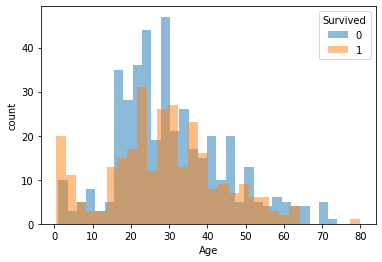

In [7]:
plt.hist(train.loc[train['Survived'] == 0 , 'Age'].dropna(), bins=30, alpha=0.5, label='0')
plt.hist(train.loc[train['Survived'] == 1 , 'Age'].dropna(), bins=30, alpha=0.5, label='1')
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(title='Survived')

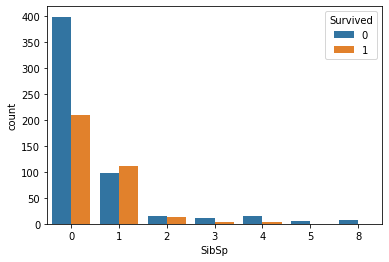

In [8]:
sns.countplot(x='SibSp', hue='Survived', data=train)
plt.legend(loc='upper right', title='Survived')

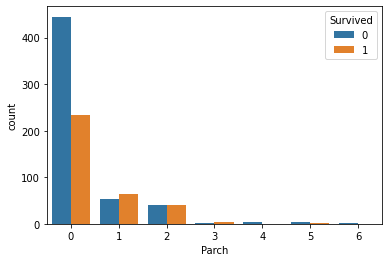

In [9]:
sns.countplot(x='Parch', hue='Survived', data=train)
plt.legend(loc='upper right', title='Survived')

(-5.0, 255.0)

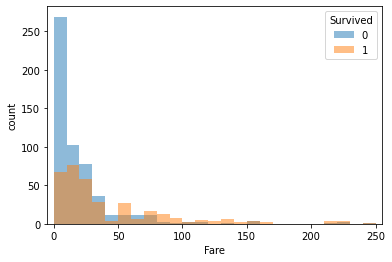

In [10]:
plt.hist(train.loc[train['Survived'] == 0 , 'Fare'].dropna(), range=(0,250), bins=25, alpha=0.5, label='0')
plt.hist(train.loc[train['Survived'] == 1 , 'Fare'].dropna(), range=(0,250), bins=25, alpha=0.5, label='1')
plt.xlabel('Fare')
plt.ylabel('count')
plt.legend(title='Survived')
plt.xlim(-5, 255)
# plt.ylim(0, 50)

No handles with labels found to put in legend.


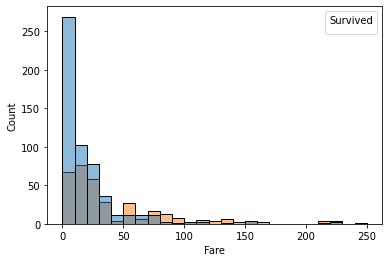

In [11]:
sns.histplot(x='Fare', hue='Survived',bins=25, binrange=(0,250), data=train)
plt.legend(loc='upper right', title='Survived')

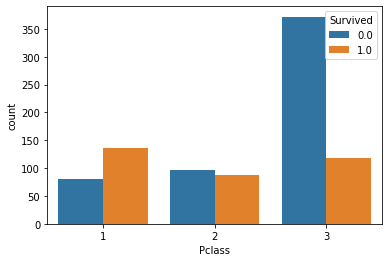

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.legend(loc='upper right', title='Survived')

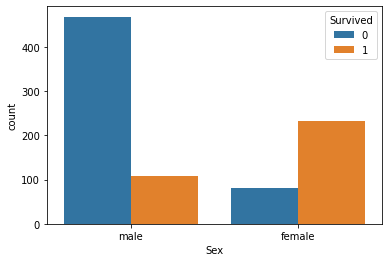

In [13]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.legend(loc='upper right', title='Survived')

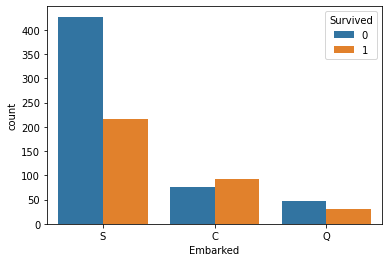

In [14]:
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.legend(loc='upper right', title='Survived')

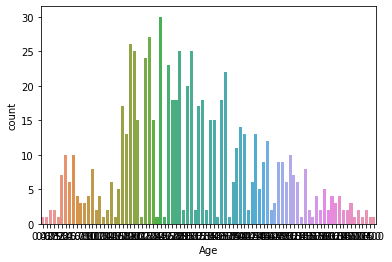

In [15]:
# age_avg = data['Age'].mean()
# age_std = data['Age'].std()
# data['Age'].fillna(np.random.randint(age_avg - age_std, age_avg + age_std), inplace=True)

data['Age'].fillna(data['Age'].median(), inplace=True)

sns.countplot(x='Age',  data=train)

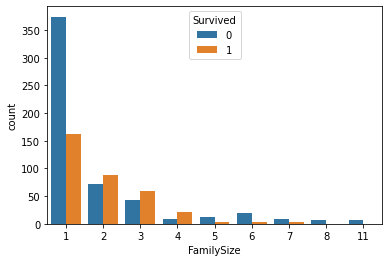

In [16]:
import seaborn as sns 

data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
train['FamilySize'] = data['FamilySize'][:len(train)]
test['FamilySize'] = data['FamilySize'][len(train):]
sns.countplot(x='FamilySize', hue='Survived',   data=train)


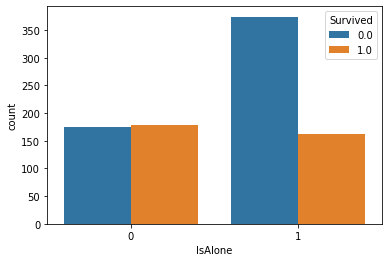

In [17]:
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1 , 'IsAlone'] = 1
sns.countplot(x='IsAlone', hue='Survived',   data=data)